В цьому домашньому завданні ми з вами побудуємо повноцінне ML-рішення реальної ML-задачі. Ви вже маєте всі знання, які для цього потрібні. Дотримуйтесь інструкцій, та користуйтесь матеріалами лекцій, аби виконувати завдання. Тут інструкції будуть детальні, а в подільших завданнях - будуть ставати все менш детальними, аби ви вже починали самостійно структурувати ML-проєкт і до кінця курсу для вас розвʼязати будь-яку ML–задачу було eazy-breezy.

## Dataset

Будемо працювати з набором даних `cars.csv`, який описує автомобілі і їх ціну у індійських рупіях :) Мета - передбачити ціну авто за його характеристиками. Опис набору даних:

| Назва рядка            | Опис                                                                                                                                                 |
|------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------|
| Car_ID                 | Унікальний ідентифікатор для кожного оголошення про автомобіль.                                                                                         |
| Brand                  | Бренд або виробник автомобіля (наприклад, Toyota, Honda, Ford тощо).                                                                                     |
| Model                  | Модель автомобіля (наприклад, Camry, Civic, Mustang тощо).                                                                                               |
| Year                   | Рік виготовлення автомобіля.                                                                                                                            |
| Kilometers_Driven      | Загальний пробіг автомобіля у кілометрах.                                                                                                               |
| Fuel_Type              | Тип палива, який використовує автомобіль (наприклад, бензин, дизель, електро тощо).                                                                      |
| Transmission           | Тип трансмісії автомобіля (наприклад, механічна, автоматична).                                                                                           |
| Owner_Type             | Кількість попередніх власників автомобіля (наприклад, перший, другий, третій).                                                                           |
| Mileage                | Паливна ефективність автомобіля у кілометрах на літр.                                                                                                   |
| Engine                 | Об'єм двигуна автомобіля в кубічних сантиметрах (CC).                                                                                                   |
| Power                  | Максимальна потужність автомобіля в кінських силах (bhp).                                                                                               |
| Seats                  | Кількість місць в автомобілі.                                                                                                                           |
| Price                  | Вартість автомобіля в INR (індійські рупії), що є цільовою змінною для прогнозування.                                                                   |

# Імпорти

Для зручності рекомендую всі імпорти розмістити тут нагорі, аби коли ви перезавантажували ноутбук, одразу можна було в один запуск клітинки імпортувати всі потрібні бібліотеки.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from pandas.io.formats.printing import adjoin
from sklearn.preprocessing import OrdinalEncoder
from sklearn import preprocessing
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.preprocessing import OneHotEncoder

cars_df = pd.read_csv('cars.csv')

# Знайомство з даними

**Завдання 1.** Завантажте набір даних `cars.csv` в pandas.DataFrame. Виведіть перші 5 записів.

In [2]:
cars_df.head()

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1,Toyota,Corolla,2018,50000,Petrol,Manual,First,15,1498,108,5,800000
1,2,Honda,Civic,2019,40000,Petrol,Automatic,Second,17,1597,140,5,1000000
2,3,Ford,Mustang,2017,20000,Petrol,Automatic,First,10,4951,395,4,2500000
3,4,Maruti,Swift,2020,30000,Diesel,Manual,Third,23,1248,74,5,600000
4,5,Hyundai,Sonata,2016,60000,Diesel,Automatic,Second,18,1999,194,5,850000


**Завдання 2.** Виведіть типи даних колонок даних, а також дослідіть, які по факту типи даних мають записи в кожній колонці (тип `object` може містити різні типи даних) і скільки значень є в кожній категоріальній колонці.

Напишіть висновок, скільки в наборі даних числових та категоріальних колонок кожного з трьох різних типів (бінарна, мільтикатегоріальна без порядку, мультикатегоріальна з порядком). Шаблон висновку

```
В наборі даних 10 числових і 10 категоріальних колонок з них
- 2 бінарні (мають лише 2 значення)
- 6 мультикатегоріальних (більше 2х значень) зі значеннями, для яких немає відношення порядку
- 2 колонки, в яких можна встановити відношення порядку (наприклад Small<Medium<Large)
```

Якщо не знаєте, як це зробити з `pandas` - ось підказка, які методи можуть допомогти вам виконати це завдання

- pandas.DataFrame.info()
- pandas.DataFrame.dtypes
- pandas.DataFrame.loc[...]
- pandas.DataFrame.select_dtypes(...)
- pandas.Series.unique()
- pandas.Series.nunique()

Детальніше ознайомитись з кожним ви можете в [документації](https://pandas.pydata.org/docs/reference/frame.html), або написати в окремій клітинці знак питання і назву методу (тільки приберіть це перед здачею, бо перегляд документації - не допомагає зрозуміти дані і хід думок, а Ваша робота - це як презентація замовнику зробленої задачі).


In [3]:
# приклад як викликати документацію, якщо у Вас pandas імпортований як pd
# ?pd.DataFrame.info

In [4]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Car_ID             100 non-null    int64 
 1   Brand              100 non-null    object
 2   Model              100 non-null    object
 3   Year               100 non-null    int64 
 4   Kilometers_Driven  100 non-null    int64 
 5   Fuel_Type          100 non-null    object
 6   Transmission       100 non-null    object
 7   Owner_Type         100 non-null    object
 8   Mileage            100 non-null    int64 
 9   Engine             100 non-null    int64 
 10  Power              100 non-null    int64 
 11  Seats              100 non-null    int64 
 12  Price              100 non-null    int64 
dtypes: int64(8), object(5)
memory usage: 10.3+ KB


In [5]:
cars_df.dtypes

Car_ID                int64
Brand                object
Model                object
Year                  int64
Kilometers_Driven     int64
Fuel_Type            object
Transmission         object
Owner_Type           object
Mileage               int64
Engine                int64
Power                 int64
Seats                 int64
Price                 int64
dtype: object

In [6]:
print(cars_df.loc[:,'Brand'].unique())
print('\n')
print(cars_df.loc[:,'Model'].unique())
print('\n')
print(cars_df.loc[:,'Fuel_Type'].unique())
print('\n')
print(cars_df.loc[:,'Transmission'].unique())
print('\n')
print(cars_df.loc[:,'Owner_Type'].unique())

['Toyota' 'Honda' 'Ford' 'Maruti' 'Hyundai' 'Tata' 'Mahindra' 'Volkswagen'
 'Audi' 'BMW' 'Mercedes']


['Corolla' 'Civic' 'Mustang' 'Swift' 'Sonata' 'Nexon' 'Scorpio' 'Polo'
 'A4' 'X1' 'C-Class' 'Endeavour' 'Creta' 'Harrier' 'Ertiga' 'City'
 'Tiguan' 'Q3' '5 Series' 'GLC' 'Innova' 'Figo' 'Verna' 'Altroz' 'Thar'
 'Passat' 'A6' 'X3' 'E-Class' 'Fortuner' 'Aspire' 'Elantra' 'Safari'
 'Vitara' 'WR-V' 'Ameo' 'A3' '7 Series' 'GLE' 'Yaris' 'Ranger' 'Santro'
 'Tigor' 'S-Cross' 'BR-V' 'T-Roc' 'Q7' 'X5' 'GLA' 'Camry' 'Venue' 'Tiago'
 'XUV300' 'Vento' 'A5' '3 Series' 'Innova Crysta' 'EcoSport']


['Petrol' 'Diesel']


['Manual' 'Automatic']


['First' 'Second' 'Third']


In [7]:
cars_df.select_dtypes(include=['int64', 'object'])

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1,Toyota,Corolla,2018,50000,Petrol,Manual,First,15,1498,108,5,800000
1,2,Honda,Civic,2019,40000,Petrol,Automatic,Second,17,1597,140,5,1000000
2,3,Ford,Mustang,2017,20000,Petrol,Automatic,First,10,4951,395,4,2500000
3,4,Maruti,Swift,2020,30000,Diesel,Manual,Third,23,1248,74,5,600000
4,5,Hyundai,Sonata,2016,60000,Diesel,Automatic,Second,18,1999,194,5,850000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,Mercedes,C-Class,2019,22000,Diesel,Automatic,First,16,1950,191,5,2900000
96,97,Toyota,Innova Crysta,2017,38000,Diesel,Manual,Second,13,2755,171,7,1400000
97,98,Ford,EcoSport,2018,26000,Petrol,Manual,Third,18,1497,121,5,750000
98,99,Hyundai,Verna,2019,24000,Petrol,Automatic,Second,17,1497,113,5,850000


In [8]:
print('Year column')
print('Unique values:')
print(cars_df.loc[:,'Year'].unique().tolist())
print('Not null values:')
print(cars_df['Year'].notnull().sum())
print('\n')
print('Kilometers_Driven column')
print('Unique values:')
print(cars_df.loc[:,'Kilometers_Driven'].unique().tolist())
print('Not null values:')
print(cars_df['Kilometers_Driven'].notnull().sum())
print('\n')
print('Mileage column')
print('Unique values:')
print(cars_df.loc[:,'Mileage'].unique().tolist())
print('Not null values:')
print(cars_df['Mileage'].notnull().sum())
print('\n')
print('Engine column')
print('Unique values:')
print(cars_df.loc[:,'Engine'].unique().tolist())
print('Not null values:')
print(cars_df['Engine'].notnull().sum())
print('\n')
print('Power column')
print('Unique values:')
print(cars_df.loc[:,'Power'].unique().tolist())
print('Not null values:')
print(cars_df['Power'].notnull().sum())
print('\n')
print('Seats column')
print('Unique values:')
print(cars_df.loc[:,'Seats'].unique().tolist())
print('Not null values:')
print(cars_df['Seats'].notnull().sum())
print('\n')
print('Price column')
print('Unique values:')
print(cars_df.loc[:,'Price'].unique().tolist())
print('Not null values:')
print(cars_df['Price'].notnull().sum())
print('\n')


Year column
Unique values:
[2018, 2019, 2017, 2020, 2016, 2021]
Not null values:
100


Kilometers_Driven column
Unique values:
[50000, 40000, 20000, 30000, 60000, 35000, 45000, 25000, 28000, 22000, 18000, 42000, 32000, 38000, 24000, 26000, 15000, 10000]
Not null values:
100


Mileage column
Unique values:
[15, 17, 10, 23, 18, 20, 16, 12, 19, 25, 13, 24, 22, 14, 21]
Not null values:
100


Engine column
Unique values:
[1498, 1597, 4951, 1248, 1999, 1198, 2179, 999, 1968, 1995, 1991, 2198, 1497, 1956, 1462, 1395, 2755, 1194, 1582, 1199, 2184, 1984, 1950, 1197, 2993, 2996, 1496, 1086, 1047, 2967, 2998, 2143, 2487, 2261, 1598, 1998]
Not null values:
100


Power column
Unique values:
[108, 140, 395, 74, 194, 76, 187, 190, 181, 158, 113, 167, 103, 98, 141, 148, 241, 171, 94, 126, 85, 130, 174, 191, 150, 261, 362, 106, 68, 69, 245, 335, 170, 176, 396, 81, 84, 115, 258, 121]
Not null values:
100


Seats column
Unique values:
[5, 4, 7]
Not null values:
100


Price column
Unique values:
[800000, 

```
В наборі даних 8 числових і 5 категоріальних колонок з них
- 2 бінарні (мають лише 2 значення)
- 2 мультикатегоріальних (більше 2х значень) зі значеннями, для яких немає відношення порядку
- 1 колонка, в якій можна встановити відношення порядку (наприклад First<Second<Third)
```

**Завдання 3**. Розділіть дані на тренувальні і тест. Відведіть в тест 20%, поставте `random_state=12`. Ми будемо передбачати колонку `Price` - тож, вона є цільовою змінною. В результаті у Вас має бути 4 набори даних `X_train, X_test, y_train, y_test`.

Надалі ми всюди тренуємо методи для кодування, масштабування та саму модель тільки на тренувальних даних X_train (та y_train для моделі), а на тестувальних лише використовуємо вже навчені методи для кодування, масштабування і модель викликаючи в них `transform()` (для методів обробки даних) або `predict()` (для моделі).

І так само треба робити завжди.

In [9]:
inputs = cars_df.drop(columns=['Price'])
targets = cars_df['Price']

X_train, X_test, y_train, y_test = train_test_split(inputs, targets, test_size=0.2, random_state=12)

**Завдання 4**. Кодуємо категоріальні колонки.

1. Закодуйте колонки з бінарними значеннями `Fuel_Type` і `Transmission` так, аби вони були у чисельному представленні і містили лише 0 так 1. Приклад був у лекції. Значення 1 нехай буде у категорії, яка містить більше значень в колонці.

2. Закодуйте колонку `Brand` з використанням `sklearn.preprocessing.OneHotEncoder` аналогічно до того, як ми робили це в лекції. Увага! Ми робимо виклик методу `Encoder.fit()` на тренувальних даних `X_train`, а на тестувальних тільки викликаємо `Encoder.transform()`. Додайте закодовані значення в набори даних `X_train`, `X_test`.

3. Колонку `Owner_Type` з використанням `sklearn.preprocessing.OrdinalEncoder` я закодую для вас. Проаналізуйте, що відбувається.

Колонка `Model` містять забагато значень для кодування в тому вигляді, як вона є зараз, з огляду на невелику кількість даних. Якщо ви бачите, як можна згрупувати значення в цій колонці скоротивши кількість унікальних значень до 3-5, то можете виконати ще цю трансформацію, використати цю колонку в моделі і отримати додаткову практику і бал, якщо все буде зроблено правильно. А якщо неправильно - то фідбек на Вашу роботу :)

In [10]:
cars_df.Fuel_Type.unique()

array(['Petrol', 'Diesel'], dtype=object)

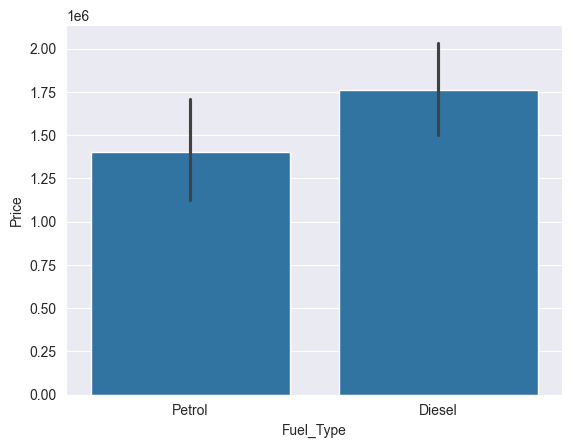

In [11]:
sns.barplot(x='Fuel_Type', y='Price', data=cars_df)
fuel_type_codes = {'Petrol': 0, 'Diesel': 1}
cars_df['Fuel_Type_Code'] = cars_df.Fuel_Type.map(fuel_type_codes)
cars_df.Price.corr(cars_df.Fuel_Type_Code)

X_train['Fuel_Type_Code'] = cars_df.Fuel_Type.map(fuel_type_codes)
X_test['Fuel_Type_Code'] = cars_df.Fuel_Type.map(fuel_type_codes)

In [12]:
cars_df.Transmission.unique()

array(['Manual', 'Automatic'], dtype=object)

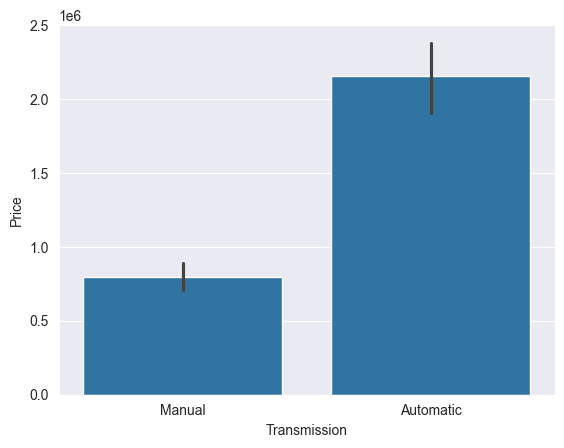

In [13]:
sns.barplot(x='Transmission', y='Price', data=cars_df)
transmission_codes = {'Automatic': 1, 'Manual': 0}
cars_df['Transmission_Code'] = cars_df.Transmission.map(transmission_codes)
cars_df.Price.corr(cars_df.Transmission_Code)

X_train['Transmission_Code'] = cars_df.Transmission.map(transmission_codes)
X_test['Transmission_Code'] = cars_df.Transmission.map(transmission_codes)

Закодуйте колонку `Brand` з використанням `sklearn.preprocessing.OneHotEncoder` аналогічно до того, як ми робили це в лекції. Увага! Ми робимо виклик методу `Encoder.fit()` на тренувальних даних `X_train`, а на тестувальних тільки викликаємо `Encoder.transform()`. Додайте закодовані значення в набори даних `X_train`, `X_test`.

In [14]:
# Initialize OneHotEncoder
enc = preprocessing.OneHotEncoder(sparse_output=False, handle_unknown='ignore')  # Use handle_unknown='ignore' to avoid errors with unseen categories

# Fit the encoder on the training data
enc.fit(X_train[['Brand']])

# Transform the training data
one_hot_train = enc.transform(X_train[['Brand']])
# Create a DataFrame with the one-hot encoded columns
one_hot_train_df = pd.DataFrame(one_hot_train, columns=enc.get_feature_names_out(['Brand']))

# Concatenate the original training DataFrame with the one-hot encoded DataFrame
X_train = pd.concat([X_train.reset_index(drop=True), one_hot_train_df.reset_index(drop=True)], axis=1)

# Transform the test data using the fitted encoder
one_hot_test = enc.transform(X_test[['Brand']])
# Create a DataFrame with the one-hot encoded columns for the test set
one_hot_test_df = pd.DataFrame(one_hot_test, columns=enc.get_feature_names_out(['Brand']))

# Concatenate the original test DataFrame with the one-hot encoded DataFrame
X_test = pd.concat([X_test.reset_index(drop=True), one_hot_test_df.reset_index(drop=True)], axis=1)

Колонку `Owner_Type` з використанням `sklearn.preprocessing.OrdinalEncoder` я закодую для вас. Проаналізуйте, що відбувається.

In [15]:
ordenc = OrdinalEncoder(categories=[['First', 'Second', 'Third']])
ordenc.fit(X_train[['Owner_Type']])

X_train['Owner_Type_Codes'] = ordenc.transform(X_train[['Owner_Type']])
X_test['Owner_Type_Codes'] = ordenc.transform(X_test[['Owner_Type']])

Колонка `Model` містять забагато значень для кодування в тому вигляді, як вона є зараз, з огляду на невелику кількість даних. Якщо ви бачите, як можна згрупувати значення в цій колонці скоротивши кількість унікальних значень до 3-5, то можете виконати ще цю трансформацію, використати цю колонку в моделі і отримати додаткову практику і бал, якщо все буде зроблено правильно. А якщо неправильно - то фідбек на Вашу роботу :)

In [16]:
model_category = {
    # Toyota
    "Corolla": "Mainstream",
    "Camry": "Mainstream",          # Often mid-to-upper segment, but we'll keep it Mainstream
    "Yaris": "Mainstream",
    "Innova": "Mainstream",
    "Innova Crysta": "Mainstream",
    "Fortuner": "Mainstream",

    # Honda
    "Civic": "Mainstream",
    "City": "Mainstream",
    "BR-V": "Mainstream",
    "WR-V": "Mainstream",

    # Ford
    "Mustang": "Mainstream",        # Could arguably be "Sports," but we'll list as Mainstream
    "Endeavour": "Mainstream",      # Large SUV, but typically still mainstream brand
    "Figo": "Mainstream",
    "Aspire": "Mainstream",
    "Ranger": "Mainstream",
    "EcoSport": "Mainstream",

    # Maruti (Suzuki)
    "Swift": "Mainstream",
    "Ertiga": "Mainstream",
    "Vitara": "Mainstream",
    "S-Cross": "Mainstream",

    # Hyundai
    "Sonata": "Mainstream",
    "Verna": "Mainstream",
    "Creta": "Mainstream",
    "Elantra": "Mainstream",
    "Santro": "Mainstream",
    "Venue": "Mainstream",

    # Tata
    "Nexon": "Mainstream",
    "Harrier": "Mainstream",
    "Safari": "Mainstream",
    "Altroz": "Mainstream",
    "Tiago": "Mainstream",
    "Tigor": "Mainstream",

    # Mahindra
    "Scorpio": "Mainstream",
    "Thar": "Mainstream",
    "XUV300": "Mainstream",

    # Volkswagen
    "Polo": "Mainstream",
    "Passat": "Mainstream",
    "Vento": "Mainstream",
    "T-Roc": "Mainstream",
    "Tiguan": "Mainstream",
    "Ameo": "Mainstream",

    # Audi (Luxury brand of VW Group)
    "A4": "Luxury",
    "A6": "Luxury",
    "A5": "Luxury",
    "A3": "Luxury",
    "Q3": "Luxury",
    "Q7": "Luxury",

    # BMW
    "X1": "Luxury",
    "X3": "Luxury",
    "X5": "Luxury",
    "3 Series": "Luxury",
    "5 Series": "Luxury",
    "7 Series": "Luxury",

    # Mercedes
    "C-Class": "Luxury",
    "E-Class": "Luxury",
    "GLC": "Luxury",
    "GLA": "Luxury",
    "GLE": "Luxury",

    # Any missing or unexpected models default to "Mainstream" or "Other"
    # "Ranger" appears in some markets for Ford (already listed above),
    # so you can define fallback for unlisted:
    "UnknownModel": "Mainstream"
}

def map_to_category(model_name):
    return model_category.get(model_name, "Mainstream")  # Default to "Mainstream" if not found

In [17]:

# Apply the mapping to both training and test datasets
X_train["ModelCategory"] = X_train["Model"].apply(map_to_category)
X_test["ModelCategory"] = X_test["Model"].apply(map_to_category)


ohe = OneHotEncoder(handle_unknown='ignore')
X_train_encoded = ohe.fit_transform(X_train[["ModelCategory"]])
X_test_encoded = ohe.transform(X_test[["ModelCategory"]])

# Convert the encoded arrays back to DataFrames
X_train_encoded_df = pd.DataFrame(X_train_encoded.toarray(), columns=ohe.get_feature_names_out(["ModelCategory"]))
X_test_encoded_df = pd.DataFrame(X_test_encoded.toarray(), columns=ohe.get_feature_names_out(["ModelCategory"]))

# Concatenate the encoded DataFrames with the original training and test sets (excluding ModelCategory)
X_train = pd.concat([X_train.reset_index(drop=True).drop(columns=["Model", "ModelCategory"]), X_train_encoded_df], axis=1)
X_test = pd.concat([X_test.reset_index(drop=True).drop(columns=["Model", "ModelCategory"]), X_test_encoded_df], axis=1)


Очікуваний результат після трансформацій:

In [18]:
pd.set_option('display.max_columns', 100)
display(X_train.head()), display(X_test.head())

,Car_ID,Brand,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Fuel_Type_Code,Transmission_Code,Brand_Audi,Brand_BMW,Brand_Ford,Brand_Honda,Brand_Hyundai,Brand_Mahindra,Brand_Maruti,Brand_Mercedes,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Owner_Type_Codes,ModelCategory_Luxury,ModelCategory_Mainstream
0,84,Volkswagen,2019,22000,Petrol,Automatic,Second,18,1498,148,5,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
1,56,Audi,2018,28000,Diesel,Automatic,First,17,1968,187,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,27,Audi,2018,28000,Petrol,Automatic,First,15,1984,241,5,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,55,Volkswagen,2017,32000,Petrol,Manual,Second,18,1598,103,5,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
4,20,Mercedes,2017,26000,Petrol,Automatic,Second,12,1991,241,5,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0


,Car_ID,Brand,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Fuel_Type_Code,Transmission_Code,Brand_Audi,Brand_BMW,Brand_Ford,Brand_Honda,Brand_Hyundai,Brand_Mahindra,Brand_Maruti,Brand_Mercedes,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Owner_Type_Codes,ModelCategory_Luxury,ModelCategory_Mainstream
0,18,Audi,2016,38000,Petrol,Automatic,Second,15,1395,148,5,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,42,Hyundai,2019,26000,Petrol,Manual,Third,20,1086,68,5,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0
2,93,Volkswagen,2017,32000,Petrol,Manual,Second,18,1598,103,5,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
3,15,Maruti,2020,18000,Petrol,Manual,First,19,1462,103,7,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,69,Ford,2019,26000,Petrol,Manual,Third,20,1194,94,5,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0


(None, None)

**Завдання 5.** Оберіть лише числові колонки з `X_train` (можна для цього використати `pandas.select_dtypes(...)` або видалити всі НЕчислові дані, вони нам вже не потрібні), обʼєднайте ці дані з `y_train` (зручно з `pandas.concat([df1, df2], axis=1)`), побудуйте для цих даних матрицю кореляції і проаналізуйте її. Напишіть висновок, які колонки корелюють з цільовою змінною на більш ніж 0.5 за модулем (може бути як позитивна, так і негативна кореляція).

In [19]:
X_train.dtypes

Car_ID                        int64
Brand                        object
Year                          int64
Kilometers_Driven             int64
Fuel_Type                    object
Transmission                 object
Owner_Type                   object
Mileage                       int64
Engine                        int64
Power                         int64
Seats                         int64
Fuel_Type_Code                int64
Transmission_Code             int64
Brand_Audi                  float64
Brand_BMW                   float64
Brand_Ford                  float64
Brand_Honda                 float64
Brand_Hyundai               float64
Brand_Mahindra              float64
Brand_Maruti                float64
Brand_Mercedes              float64
Brand_Tata                  float64
Brand_Toyota                float64
Brand_Volkswagen            float64
Owner_Type_Codes            float64
ModelCategory_Luxury        float64
ModelCategory_Mainstream    float64
dtype: object

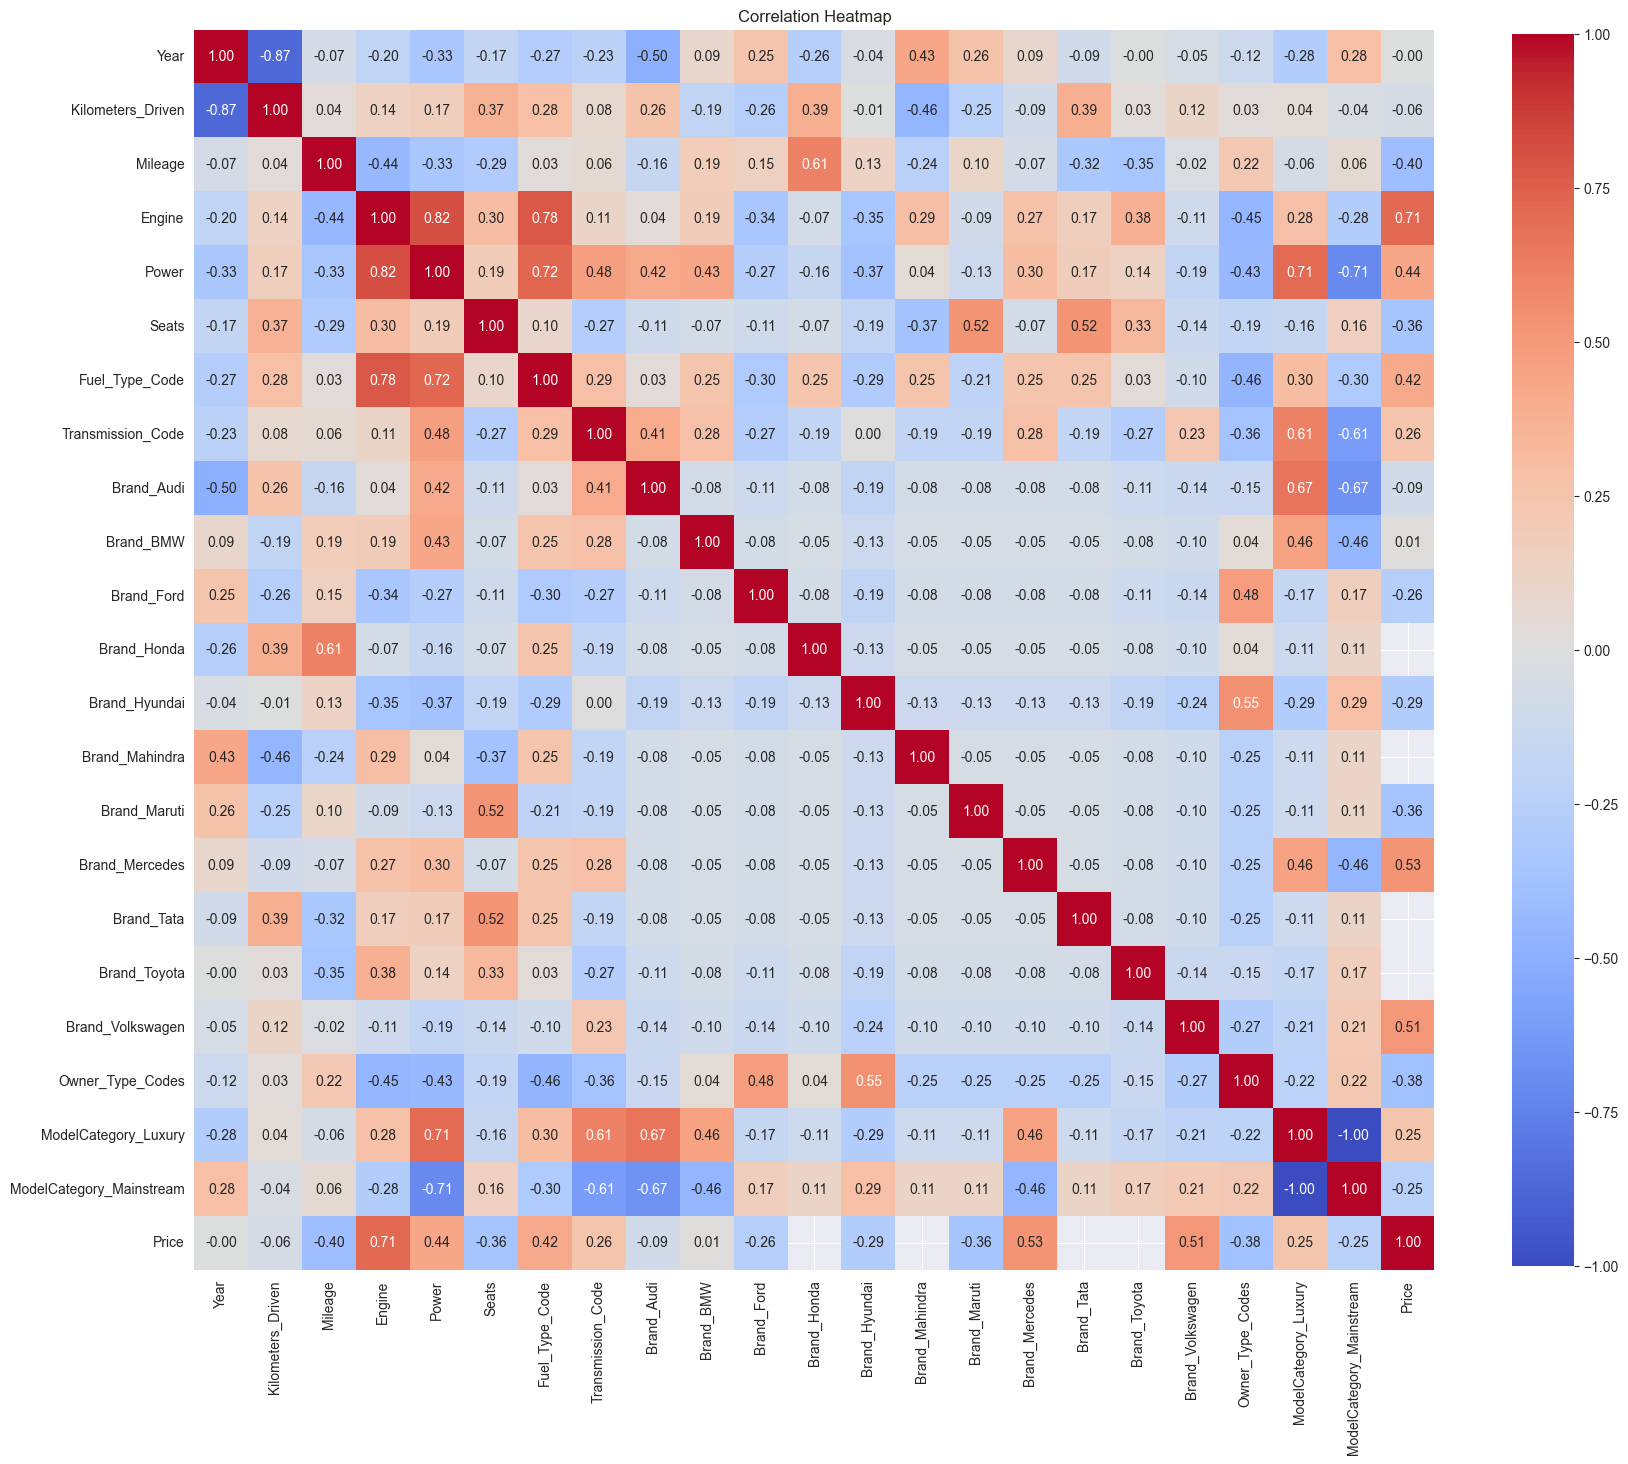

In [20]:
numeric_train = X_test.select_dtypes(include=['int64', 'float64'])
numeric_train = numeric_train.drop(columns=['Car_ID'])

X_train_numeric = pd.concat([numeric_train, y_train], axis=1)
correlation_train_matrix = X_train_numeric.corr()

plt.figure(figsize = (20, 20))

sns.heatmap(correlation_train_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

plt.title('Correlation Heatmap')

plt.show()

Як видно з heatmap кореляції, з ціною найбільше корелюють такі колонки як "Brand" та "Engine", причому з брендів найбільше корелюють такі: "Mercedes" та "Volkswagen"

**Завдання 6**. Тренуємо лінійну регресію.
0. Видаліть усі НЕчислові колонки з `X_train`, `X_test`, якщо ще цього не зробили.
1. Натренуйте лінійну регресую з `sklearn` на усіх числових даних тренувального набору `X_train`.
2. Зробіть передбачення на  `X_train`, `X_test`. Знайдіть і виведіть root mean squared error відхилення передбачення від справжніх значень цільової змінної.
3. Побудуйте графік розсіювання передбачень проти реальних даних цільової змінної для тренувального і тестувального наборів даних. Що можете сказати про якість моделі?

In [21]:
# Keep only numerical columns in X_train
X_train_numeric = X_train.select_dtypes(include=['int64', 'float64'])

# Keep only numerical columns in X_test
X_test_numeric = X_test.select_dtypes(include=['int64', 'float64'])

# Overwrite the original DataFrames with only numerical columns
X_train = X_train_numeric
X_test = X_test_numeric

In [22]:
X_train.head()

,Car_ID,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Fuel_Type_Code,Transmission_Code,Brand_Audi,Brand_BMW,Brand_Ford,Brand_Honda,Brand_Hyundai,Brand_Mahindra,Brand_Maruti,Brand_Mercedes,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Owner_Type_Codes,ModelCategory_Luxury,ModelCategory_Mainstream
0,84,2019,22000,18,1498,148,5,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
1,56,2018,28000,17,1968,187,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,27,2018,28000,15,1984,241,5,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,55,2017,32000,18,1598,103,5,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
4,20,2017,26000,12,1991,241,5,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0


In [23]:
X_test.head()

,Car_ID,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Fuel_Type_Code,Transmission_Code,Brand_Audi,Brand_BMW,Brand_Ford,Brand_Honda,Brand_Hyundai,Brand_Mahindra,Brand_Maruti,Brand_Mercedes,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Owner_Type_Codes,ModelCategory_Luxury,ModelCategory_Mainstream
0,18,2016,38000,15,1395,148,5,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,42,2019,26000,20,1086,68,5,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0
2,93,2017,32000,18,1598,103,5,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
3,15,2020,18000,19,1462,103,7,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,69,2019,26000,20,1194,94,5,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0


Train RMSE: 210293.57828151848
Train mean price: 1680000.0
Train Mean/RMSE: 7.988831678687764


Test RMSE: 258181.56112032302
Test mean price: 1150000.0
Test Mean/RMSE: 4.454229787014316


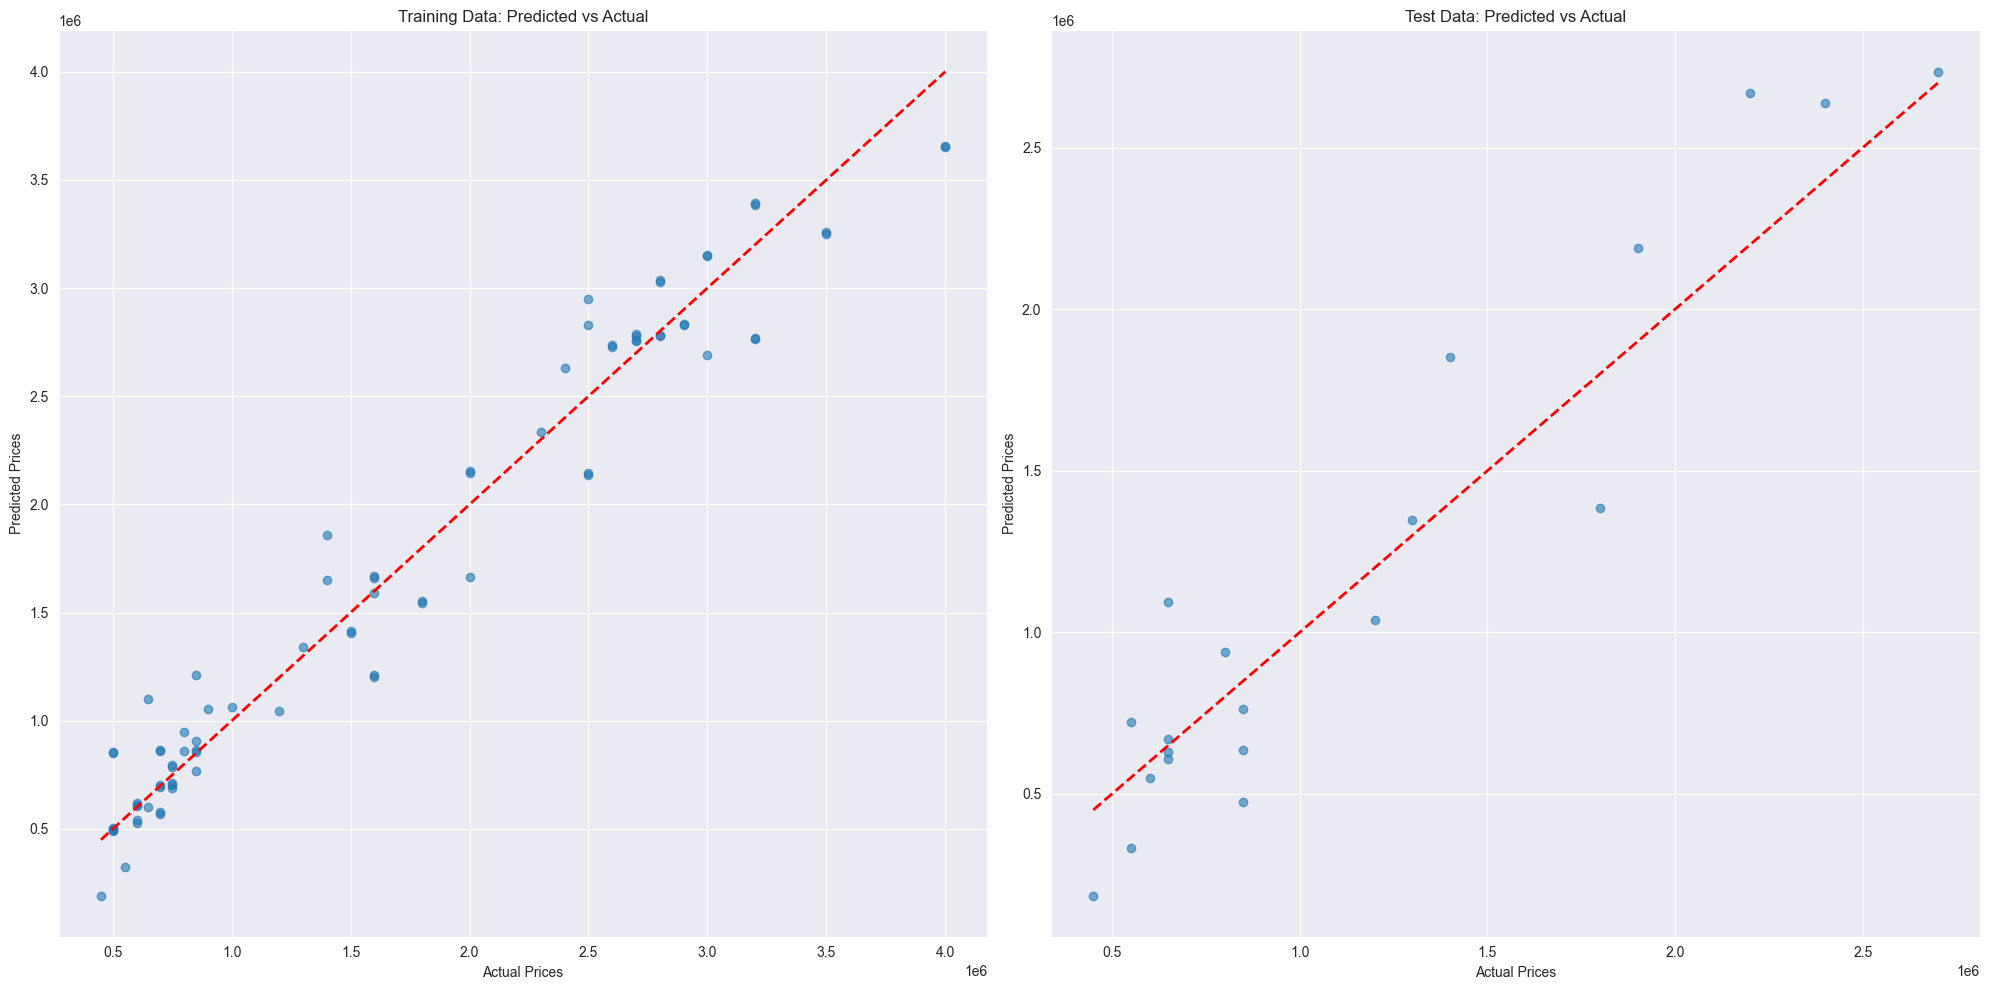

In [24]:
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate RMSE
train_rmse = root_mean_squared_error(y_train, y_train_pred)
test_rmse = root_mean_squared_error(y_test, y_test_pred)

train_mean_price = y_train.mean()
test_mean_price = y_test.mean()

print(f'Train RMSE: {train_rmse}')
print(f'Train mean price: {train_mean_price}')
print(f'Train Mean/RMSE: {train_mean_price/train_rmse}')
print('\n')
print(f'Test RMSE: {test_rmse}')
print(f'Test mean price: {test_mean_price}')
print(f'Test Mean/RMSE: {test_mean_price/test_rmse}')


plt.figure(figsize = (20, 10))

# Scatter plot for training data
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, alpha=0.6)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
plt.title('Training Data: Predicted vs Actual')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')

# Scatter plot for test data
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Test Data: Predicted vs Actual')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')

plt.tight_layout()
plt.show()

Як бачимо, вцілому модель непогано впоралася з передбаченням ціни як на тестовому так і на train сеті.
Показник RMSE теж говорить про це:
 - у випадку train датасету RMSE виявися у 7.9 разів меншим за середнє значення ціни і передбачення правильно відображає передбачення ціни
 - у випадку test датасету RMSE виявилася у 4.5 разів меншою ніж середня ціна і лінія теж правильно відображає напрямок зміни ціни навіть з урахуванням того, що даних значно менше.


**Завдання 7**. Ми хочемо проаналізувати як впливає кожен чинник на цілову змінну. Для цього давайте промасштабуємо наші дані.
1. Зробіть масштабування незалежних змінних використовуючи `StandardScaler`. Тренуємо на тренувальних даних, а на тестувальних лише викликаємо `transform`.

2. Натренуйте модель на відмасштабованих даних і перегляньте коефіцієнти моделі. Які колонки є найвпливовішими на формування передбачення з точки зору коефіцієнтів? Проаналізуйте напрям дії найважливіших коефіцієнтів. Чи це логічно з точки зору значення відповідних змінних, що вони впливають на цільову змінну саме в напрямі збільшення / зменшення?

In [25]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert scaled data back to DataFrame with original column names
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

model = LinearRegression()

model.fit(X_train_scaled, y_train)

coefficients = model.coef_
feature_names = X_train.columns

coefficients_df = pd.DataFrame(coefficients, index=feature_names, columns=['Coefficient']).sort_values(by='Coefficient', ascending=False)

coefficients_df

,Coefficient
Power,496769.214899
Fuel_Type_Code,183848.018909
ModelCategory_Luxury,148193.817377
Transmission_Code,116693.768206
Brand_Toyota,76720.100149
Brand_Audi,76674.527351
Brand_Mercedes,74255.457743
Brand_BMW,72613.990378
Owner_Type_Codes,42344.952815
Car_ID,5608.685421


Як бачимо, найвпливовішою колонкою для передбачення є колонка Power - потужність автомобіля в кінських силах. Цікаво, що кількість сидінь негативно впливає на ціну автомобіля - чим менше сидінь, тим вища ціна. Скоріш за все це якісь преміумні або спортивні автомобілі.

**Завдання 8.** На тих самих відмасштабованих даних натренуйте модель з `statsmodels`. Виведіть звіт і проаналізуйте p-value коефіцієнтів. Які ознаки є стат значущими на рівні значущості 0.05? Напишіть їх список.

In [26]:
# Add a constant to the scaled training data
X_train_scaled_with_const = sm.add_constant(X_train_scaled_df)
y_train = y_train.reset_index(drop=True)

# Fit the model
model = sm.OLS(y_train, X_train_scaled_with_const)
results = model.fit()

# Print the parameters and summary
print(results.params)
results.summary()

const                       1.680000e+06
Car_ID                      5.608685e+03
Year                       -8.765646e+03
Kilometers_Driven          -9.439872e+04
Mileage                    -1.317155e+05
Engine                     -2.137745e+04
Power                       4.967692e+05
Seats                      -2.148925e+03
Fuel_Type_Code              1.838480e+05
Transmission_Code           1.166938e+05
Brand_Audi                  7.667453e+04
Brand_BMW                   7.261399e+04
Brand_Ford                 -5.405022e+04
Brand_Honda                -1.360291e+04
Brand_Hyundai              -9.882378e+04
Brand_Mahindra             -9.669188e+04
Brand_Maruti               -6.310987e+04
Brand_Mercedes              7.425546e+04
Brand_Tata                  1.155566e+03
Brand_Toyota                7.672010e+04
Brand_Volkswagen           -3.559373e+04
Owner_Type_Codes            4.234495e+04
ModelCategory_Luxury        1.481938e+05
ModelCategory_Mainstream   -1.481938e+05
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     68.35
Date:                Sun, 12 Jan 2025   Prob (F-statistic):           2.01e-33
Time:                        21:01:35   Log-Likelihood:                -1094.0
No. Observations:                  80   AIC:                             2230.
Df Residuals:                      59   BIC:                             2280.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                      1.68e+06   2.74e+04     61.363      0.000    1.63e+06    1.73e+06
Car_ID                    5608.6854   3.37e+04      0.166      0.869   -6.19e+04    7.31e+04
Year                     -8765.6457   6.09e+04     -0.144      0.886   -1.31e+05    1.13e+05
Kilometers_Driven         -9.44e+04   6.51e+04     -1.449      0.153   -2.25e+05    3.59e+04
Mileage                  -1.317e+05   5.83e+04     -2.259      0.028   -2.48e+05    -1.5e+04
Engine                   -2.138e+04   7.29e+04     -0.293      0.770   -1.67e+05    1.24e+05
Power                     4.968e+05   7.54e+04      6.588      0.000    3.46e+05    6.48e+05
Seats                    -2148.9245   4.22e+04     -0.051      0.960   -8.66e+04    8.23e+04
Fuel_Type_Code            1.838e+05   4.57e+04      4.026      0.000    9.25e+04    2.75e+05
Transmission_Code         1.167e+05    4.4e+04      2.653      0.010    2.87e+04    2.05e+05
Brand_Audi                7.667e+04   2.63e+04      2.914      0.005     2.4e+04    1.29e+05
Brand_BMW                 7.261e+04   2.68e+04      2.706      0.009    1.89e+04    1.26e+05
Brand_Ford               -5.405e+04   3.48e+04     -1.553      0.126   -1.24e+05    1.56e+04
Brand_Honda               -1.36e+04   3.31e+04     -0.411      0.682   -7.98e+04    5.26e+04
Brand_Hyundai            -9.882e+04   2.83e+04     -3.492      0.001   -1.55e+05   -4.22e+04
Brand_Mahindra           -9.669e+04   2.91e+04     -3.327      0.002   -1.55e+05   -3.85e+04
Brand_Maruti             -6.311e+04   2.82e+04     -2.242      0.029   -1.19e+05   -6781.332
Brand_Mercedes            7.426e+04   2.43e+04      3.055      0.003    2.56e+04    1.23e+05
Brand_Tata                1155.5656   3.68e+04      0.031      0.975   -7.25e+04    7.48e+04
Brand_Toyota              7.672e+04   3.29e+04      2.329      0.023    1.08e+04    1.43e+05
Brand_Volkswagen         -3.559e+04   3.04e+04     -1.169      0.247   -9.65e+04    2.53e+04
Owner_Type_Codes          4.234e+04   4.75e+04      0.892      0.376   -5.27e+04    1.37e+05
ModelCategory_Luxury      1.482e+05   1.35e+04     11.009      0.000    1.21e+05    1.75e+05
ModelCategory_Mainstream -1.482e+05   1.35e+04    -11.009      0.000   -1.75e+05   -1.21e+05
==============================================================================
Omnibus:                        0.187   Durbin-Watson:                   2.053
Prob(Omnibus):                  0.911   Jarque-Bera (JB):                0.311
Skew:                           0.104   Prob(JB):                        0.856
Kurtosis:                       2.776   Cond. No.                     1.65e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified

Як бачимо, найбільш значущими ознаками є Mileage, Power, Seats, Fuel_Type_Code, Transmission_Code, Brand_Audi, Brand_BMW, Brand_Ford, Brand_Hyundai, Brand_Mahindra, Brand_Maruti, Brand_Mercedes, Brand_Volkswagen

**Завдання 9**. Натренуйте лінійну регресію з `statsmodels` тільки на ознаках, які виявлись стат. значущими в попередньому завданні. Проаналізуйте показники моделі. Чи значно змінились R2 і Adj. R-squared?

In [27]:
selected_features = ['Mileage', 'Power', 'Seats', 'Fuel_Type_Code', 'Transmission_Code', 'Brand_Audi', 'Brand_BMW', 'Brand_Ford', 'Brand_Hyundai', 'Brand_Mahindra', 'Brand_Maruti', 'Brand_Mercedes', 'Brand_Volkswagen']
X_train_selected = X_train[selected_features]
X_train_selected_with_const = sm.add_constant(X_train_selected)

model = sm.OLS(y_train, X_train_selected_with_const)
results = model.fit()

# Print the parameters and summary
print(results.params)
results.summary()

const                931315.495279
Mileage              -41361.191117
Power                  5610.196405
Seats                  4288.135503
Fuel_Type_Code       264832.000305
Transmission_Code    268763.111577
Brand_Audi           833526.297938
Brand_BMW            936213.326119
Brand_Ford          -149932.847160
Brand_Hyundai       -387913.997800
Brand_Mahindra      -388304.690926
Brand_Maruti        -209220.753257
Brand_Mercedes       879332.926171
Brand_Volkswagen     -81593.083032
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     99.49
Date:                Sun, 12 Jan 2025   Prob (F-statistic):           4.41e-38
Time:                        21:01:35   Log-Likelihood:                -1100.4
No. Observations:                  80   AIC:                             2229.
Df Residuals:                      66   BIC:                             2262.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              9.313e+05   5.12e+05      1.819      0.073   -9.07e+04    1.95e+06
Mileage           -4.136e+04   1.38e+04     -3.001      0.004   -6.89e+04   -1.38e+04
Power              5610.1964    655.780      8.555      0.000    4300.890    6919.502
Seats              4288.1355    5.3e+04      0.081      0.936   -1.02e+05     1.1e+05
Fuel_Type_Code     2.648e+05   6.87e+04      3.855      0.000    1.28e+05    4.02e+05
Transmission_Code  2.688e+05   8.91e+04      3.018      0.004    9.09e+04    4.47e+05
Brand_Audi         8.335e+05   1.19e+05      6.976      0.000    5.95e+05    1.07e+06
Brand_BMW          9.362e+05   1.25e+05      7.488      0.000    6.87e+05    1.19e+06
Brand_Ford        -1.499e+05   1.21e+05     -1.235      0.221   -3.92e+05    9.25e+04
Brand_Hyundai     -3.879e+05   1.24e+05     -3.119      0.003   -6.36e+05    -1.4e+05
Brand_Mahindra    -3.883e+05   1.46e+05     -2.657      0.010    -6.8e+05   -9.66e+04
Brand_Maruti      -2.092e+05   1.31e+05     -1.599      0.115    -4.7e+05     5.2e+04
Brand_Mercedes     8.793e+05   1.25e+05      7.013      0.000    6.29e+05    1.13e+06
Brand_Volkswagen  -8.159e+04   1.25e+05     -0.653      0.516   -3.31e+05    1.68e+05
==============================================================================
Omnibus:                        1.145   Durbin-Watson:                   1.833
Prob(Omnibus):                  0.564   Jarque-Bera (JB):                1.066
Skew:                           0.275   Prob(JB):                        0.587
Kurtosis:                       2.869   Cond. No.                     3.50e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.5e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Тут ми бачимо, що F-statistics стала більшою, p-value - меншим, при цьому R2 та R-adj не сильно змінилися. Отже, друга модель краща.

**Завдання 10**. Натренуйте лінійну регресію з `statsmodels` на усіх ознаках з масштабованого `X_train`, у яких p_value в завданні 8 менше за `0.25`. Ми таким чином помʼякшили критерій відбору ознак. Проаналізуйте показники моделі. Чи значно змінились R2 і Adj. R-squared порівняно з завданням 7? Яку модель з останніх 3х завдань ви б лишили для використання?

In [28]:
selected_features = ['Kilometers_Driven', 'Mileage', 'Power', 'Seats', 'Fuel_Type_Code', 'Transmission_Code', 'Brand_Audi', 'Brand_BMW', 'Brand_Ford', 'Brand_Honda', 'Brand_Hyundai', 'Brand_Mahindra', 'Brand_Maruti', 'Brand_Mercedes', 'Brand_Tata', 'Brand_Volkswagen']
X_train_selected = X_train[selected_features]
X_train_selected_with_const = sm.add_constant(X_train_selected)

model = sm.OLS(y_train, X_train_selected_with_const)
results = model.fit()

# Print the parameters and summary
print(results.params)
results.summary()

const                1.181656e+06
Kilometers_Driven   -8.657103e+00
Mileage             -3.379181e+04
Power                5.778729e+03
Seats                1.296635e+04
Fuel_Type_Code       3.188473e+05
Transmission_Code    2.405746e+05
Brand_Audi           6.530899e+05
Brand_BMW            6.692010e+05
Brand_Ford          -3.498653e+05
Brand_Honda         -3.350732e+05
Brand_Hyundai       -5.700423e+05
Brand_Mahindra      -6.531274e+05
Brand_Maruti        -4.726586e+05
Brand_Mercedes       6.580576e+05
Brand_Tata          -2.909440e+05
Brand_Volkswagen    -3.141492e+05
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     89.64
Date:                Sun, 12 Jan 2025   Prob (F-statistic):           4.74e-37
Time:                        21:01:35   Log-Likelihood:                -1094.7
No. Observations:                  80   AIC:                             2223.
Df Residuals:                      63   BIC:                             2264.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1.182e+06   5.35e+05      2.209      0.031    1.13e+05    2.25e+06
Kilometers_Driven    -8.6571      3.816     -2.269      0.027     -16.283      -1.031
Mileage           -3.379e+04   1.51e+04     -2.232      0.029    -6.4e+04   -3543.089
Power              5778.7285    638.399      9.052      0.000    4502.991    7054.466
Seats              1.297e+04    5.2e+04      0.249      0.804    -9.1e+04    1.17e+05
Fuel_Type_Code     3.188e+05   6.95e+04      4.585      0.000     1.8e+05    4.58e+05
Transmission_Code  2.406e+05   8.59e+04      2.801      0.007     6.9e+04    4.12e+05
Brand_Audi         6.531e+05    1.3e+05      5.013      0.000    3.93e+05    9.13e+05
Brand_BMW          6.692e+05   1.47e+05      4.551      0.000    3.75e+05    9.63e+05
Brand_Ford        -3.499e+05   1.35e+05     -2.595      0.012   -6.19e+05   -8.05e+04
Brand_Honda       -3.351e+05   1.61e+05     -2.084      0.041   -6.56e+05   -1.37e+04
Brand_Hyundai       -5.7e+05   1.44e+05     -3.968      0.000   -8.57e+05   -2.83e+05
Brand_Mahindra    -6.531e+05   1.65e+05     -3.962      0.000   -9.83e+05   -3.24e+05
Brand_Maruti      -4.727e+05   1.53e+05     -3.082      0.003   -7.79e+05   -1.66e+05
Brand_Mercedes     6.581e+05    1.4e+05      4.709      0.000    3.79e+05    9.37e+05
Brand_Tata        -2.909e+05   1.31e+05     -2.228      0.029   -5.52e+05      -3e+04
Brand_Volkswagen  -3.141e+05   1.43e+05     -2.195      0.032      -6e+05   -2.81e+04
==============================================================================
Omnibus:                        0.326   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.850   Jarque-Bera (JB):                0.477
Skew:                           0.125   Prob(JB):                        0.788
Kurtosis:                       2.716   Cond. No.                     6.17e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.17e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Тут ми бачимо, що F-statistics трохи зменшилася у порівнянні з другою моделлю, p-value стало ще меншим ніж у другої моделі, при цьому R2 та R-adj не сильно змінилися.

Підсумовуючи роботу усіх трьох моделей давайте випишемо всі характеристики для всіх трьох моделей:

**Модель 1:**
- R2 = 0.959
- R-adj = 0.945
- F-stat = 68.35
- P-val() = 2.01e-33

**Модель 2:**
- R2 = 0.951
- R-adj = 0.942
- F-stat = 99.49
- P-val() = 4.41e-38

**Модель 3:**
- R2 = 0.958
- R-adj = 0.947
- F-stat = 89.64
- P-val() = 4.74e-37

Ми бачимо, що третя модель працює краще ніж перша і трохи гірше ніж друга, тому я б обрав саме її для подальшої роботи.